<a href="https://colab.research.google.com/github/williserdman/Radar-Material-Detection-Exploration/blob/main/green_or_roasted_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import h5py

In [5]:
%pip install acconeer-exptool

In [6]:
from acconeer.exptool import a121
record = a121.load_record("green.h5")
record.extended_stacked_results

[{1: StackedResults(data_saturated=array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, F

In [7]:
def process_h5(record):
  data = []
  for elm in record.extended_stacked_results:
    dframe = [elm[key].frame for key in elm.keys()]
    dframe = np.array(dframe)
    #data.append(dframe)
  return np.squeeze(abs(dframe))

In [8]:
green_record = a121.load_record("green.h5")
roasted_record = a121.load_record("roasted.h5")

In [9]:
process_h5(green_record)

array([[11.18033989,  8.06225775, 11.        , ...,  2.23606798,
         2.        ,  6.        ],
       [ 9.        , 11.18033989,  6.32455532, ...,  1.        ,
         5.09901951,  2.        ],
       [12.        ,  3.16227766, 12.36931688, ...,  4.47213595,
         1.        ,  2.        ],
       ...,
       [10.29563014,  7.07106781, 12.36931688, ...,  6.08276253,
         0.        ,  3.60555128],
       [14.        , 11.18033989,  4.47213595, ...,  3.60555128,
         2.        ,  3.        ],
       [11.66190379, 10.04987562,  8.06225775, ...,  3.16227766,
         3.60555128,  3.16227766]])

In [10]:
from scipy.signal import find_peaks
def feature_extraction(test_data):
  data = []
  for i in test_data:
    peaks, _ = find_peaks(i)
    #print(peaks)
    sorted_peaks = peaks[np.argsort(i[peaks])][::-1]
    top_two_peaks = sorted_peaks[:2]
    #print("Indices of the two peaks:", top_two_peaks)
    #print("Values of the two peaks:", i[top_two_peaks])
    features = i[top_two_peaks].tolist()
    features.append(top_two_peaks[0] / top_two_peaks[1])
    data.append(features)
  return data, len(data)

In [12]:
feature_extraction(process_h5(roasted_record))

([[283.5507009337131, 253.01383361389549, 1.0526315789473684],
  [282.0726856680738, 271.56214758320056, 1.0256410256410255],
  [288.99826989101507, 270.08332047721865, 1.0256410256410255],
  [276.55198426335687, 244.72433471152806, 1.0526315789473684],
  [283.30195904723286, 272.02941017470886, 1.0526315789473684],
  [270.11293934204633, 264.8244701684495, 1.0394736842105263],
  [277.89386463180506, 253.38705570727166, 1.0526315789473684],
  [289.08476265621476, 258.549801779077, 0.9404761904761905],
  [270.1851217221259, 253.4640013887574, 0.963855421686747],
  [276.52305509667724, 267.8245694479877, 1.0256410256410255],
  [279.87318556803547, 258.8532402733255, 1.0526315789473684],
  [283.17662332897464, 259.9423012901132, 1.0526315789473684],
  [269.60155785900054, 251.67637950352037, 1.0526315789473684],
  [301.28060010561586, 263.78210705049725, 0.9523809523809523],
  [276.4706132665821, 268.07648162418127, 1.0394736842105263],
  [267.52569970004754, 255.19600310349688, 1.0526315

In [13]:
gd, gl = feature_extraction(process_h5(green_record))
rd, rl = feature_extraction(process_h5(roasted_record))

data = gd + rd
labels = ["green"] * gl + ["roasted"] * rl

In [14]:
len(data), len(labels)

(413, 413)

In [15]:
data = np.array(data)
labels = np.array(labels)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [17]:
X_test, y_test

(array([[284.11617342, 260.41505333,   1.05263158],
        [269.32879534, 258.06975801,   1.02631579],
        [296.72377727, 251.74788976,   1.05263158],
        [267.00187265, 252.60443385,   0.97560976],
        [150.23315213, 134.33167906,   1.05714286],
        [269.05018119, 247.3580401 ,   1.05263158],
        [275.63200104, 251.56311335,   1.05263158],
        [275.94383486, 273.71518043,   0.975     ],
        [279.50849719, 259.37039153,   1.05263158],
        [151.15885684, 144.08677941,   1.04225352],
        [279.46019395, 251.28668886,   1.05263158],
        [149.32514859, 141.79210133,   1.02777778],
        [145.41320435, 144.91721775,   0.97222222],
        [148.66068747, 146.26346092,   1.05714286],
        [149.0536816 , 148.47558722,   1.05714286],
        [147.25827651, 136.41847382,   1.08823529],
        [149.91330828, 142.61837189,   1.05714286],
        [271.28029785, 264.00757565,   1.05263158],
        [141.94717327, 137.3062271 ,   1.04285714],
        [279

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [19]:
clf.predict([[9.23146792e+01, 2.81780056e+01, 5.60000000e-01]])[0]

'green'

In [20]:
single_tree = tree.DecisionTreeClassifier()
single_tree.fit(X_train, y_train)

single_y_pred = single_tree.predict(X_test)
single_accuracy = accuracy_score(y_test, single_y_pred)
print(f'Accuracy: {single_accuracy}')

Accuracy: 1.0


[Text(0.5, 0.75, 'x[0] <= 210.524\ngini = 0.499\nsamples = 330\nvalue = [159, 171]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 159\nvalue = [159, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 171\nvalue = [0, 171]')]

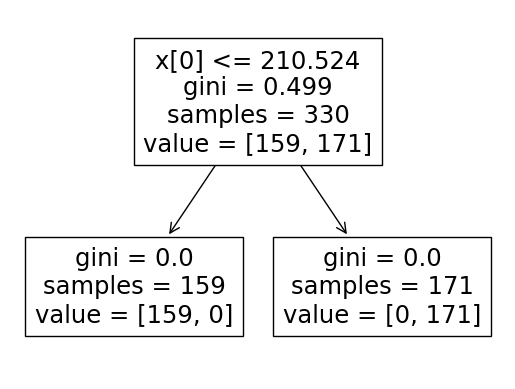

In [21]:
tree.plot_tree(single_tree)

In [31]:
unknown_record = a121.load_record("pikes_roasted.h5")
unknown_data, _ = feature_extraction(process_h5(unknown_record))
single_tree.predict(unknown_data)

In [32]:
def pred_from_file(filename):
  record = a121.load_record(filename)
  data, _ = feature_extraction(process_h5(record))
  return single_tree.predict(data)

In [33]:
pred_from_file("unknown.h5")

array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green'], dtype='<U7')